## Plots of resonance/novelty

In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import matplotlib.font_manager
import datetime as dt

In [2]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [3]:
file = "tweets_emo_date_W3_smoothed_150"
smooth = True

if smooth:
    filename = os.path.join("..","idmdl", "smoothed", f"{file}.csv")
else:
    filename = os.path.join("..","idmdl", f"{file}.csv")

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,smoothed_transience,smoothed_novelty,smoothed_resonance
0,0,2019-01-01,"[0.13655387965800936, 0.13095321826100983, 0.3...",0.000000,0.007187,0.000000,0.000000,0.001711,0.000000,0.002523,0.000912,0.000458
1,1,2019-01-02,"[0.08091568521634232, 0.09035963937652772, 0.3...",0.000000,0.003413,0.000000,0.000000,0.001666,0.000000,0.002442,0.000947,0.000424
2,2,2019-01-03,"[0.08403529679919247, 0.0910697144345674, 0.30...",0.000000,0.001530,0.000000,0.000000,0.000498,0.000000,0.002361,0.000981,0.000391
3,3,2019-01-04,"[0.0866288507944467, 0.10716675546084177, 0.30...",0.003033,0.000656,0.002376,0.001695,0.000125,0.000910,0.002280,0.001016,0.000357
4,4,2019-01-05,"[0.08950032989547523, 0.11767038233149285, 0.2...",0.002756,0.001509,0.001246,0.002022,0.001012,0.001517,0.002199,0.001050,0.000323


In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
# event_dict is a dictionary of the events to be plotted
covid_dict = {
              "first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
            #   "coronapas launced": dt.datetime(2021, 5, 27),
              # "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              # "all restrictions lifted": dt.datetime(2021, 9, 10),
              }
holidays_dict = {
  "christmas 19": dt.datetime(2019,12,24),
  "new year 19": dt.datetime(2019,12,31),
  "christmas 20": dt.datetime(2020, 12, 24),
  "new year 20": dt.datetime(2020, 12, 31)
}


In [38]:
def plot_novelty_resonance(df, measure, axis_color='darkgrey', smooth=None, event_dict=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
      raw_color = palette[5]
      smooth_color = palette[0]
    else:
      raw_color = palette[0]


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    

    x = df['date']
    y = df[measure]
    y_smoothed = df[f'smoothed_{measure}']

    plt.plot(x, y, color=raw_color, alpha=0.8, label='Raw signal')

    if smooth:
      plt.plot(x, y_smoothed, color=smooth_color, linewidth=3, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          # plt.plot(time, y_smoothed[x == time],
          #         marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          plt.axvline(x=time, color='red', linestyle='--')
          plt.text(time, 0.007, #y_smoothed[x == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)


    # axis
    ax1.set(xlabel="")

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")#, alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', labelsize=20, colors=axis_color)
    ax1.yaxis.label.set_color(axis_color)
    # plt.xticks(rotation=90)
    every_nth = 3
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)

    plt.ylabel(measure.capitalize(), color=axis_color, size=35)

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

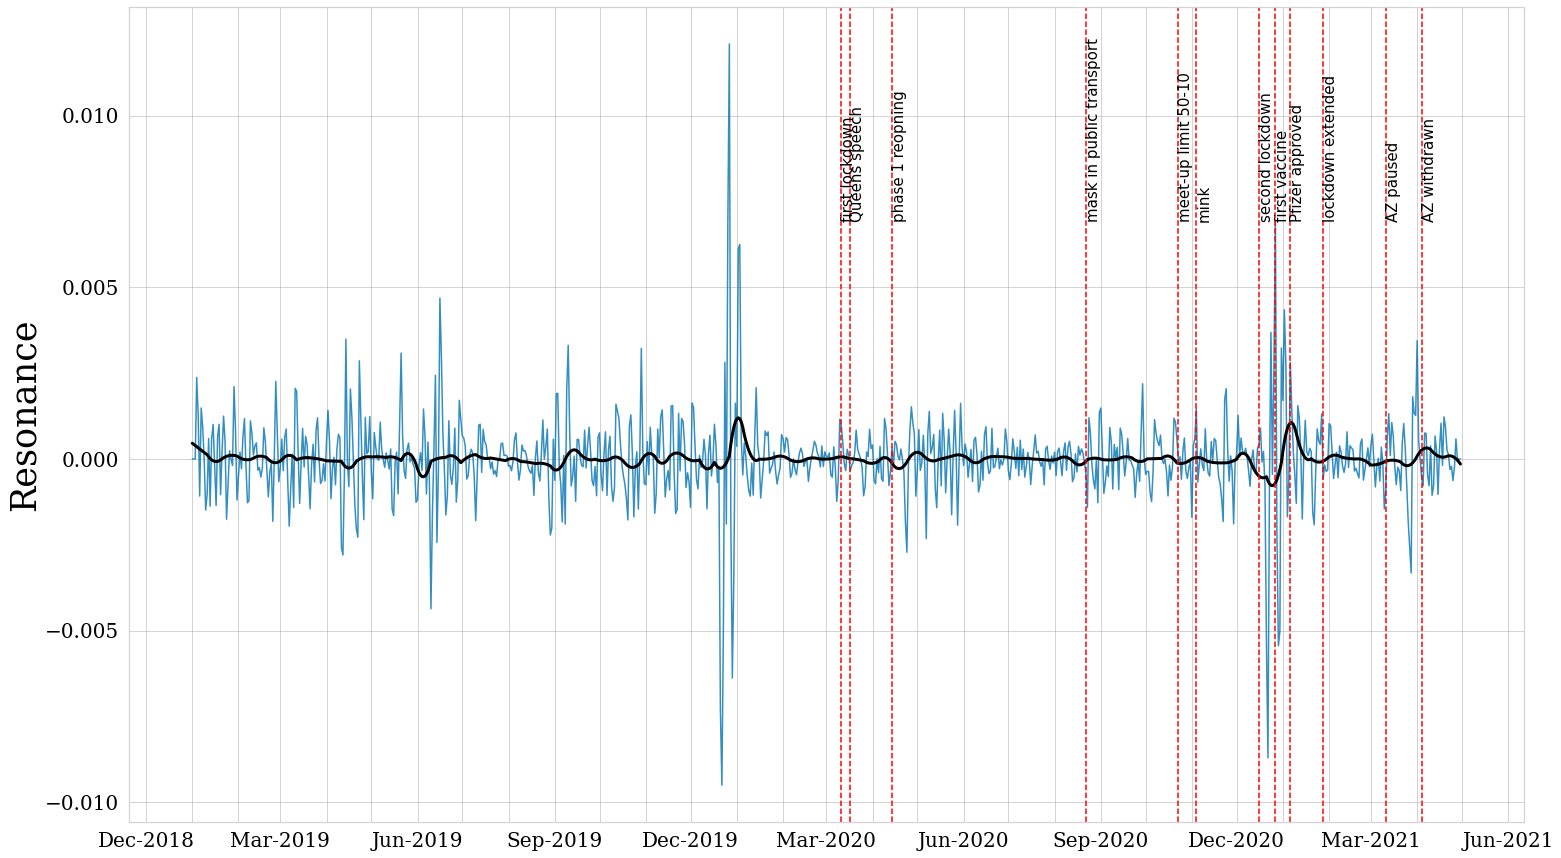

In [41]:
measure='resonance'
plot_novelty_resonance(df,measure=measure, smooth=150, axis_color='black', event_dict=covid_dict,
                       save_fig=True, plot_name=f'fig/W3_{measure}_covid_events.png')

In [24]:
def plot_two_signals(measure: str, df1, df2, label1=None, label2=None, fontsize=20, plot_name=None):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=True, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    
    plt.plot(df1["date"], df1[measure], color="#0072B2", alpha=0.7, linewidth=2, label = label1)
    plt.plot(df2["date"], df2[measure], color="#ef6d4c", alpha=0.5, linewidth=2, label = label2)
    
    if label1 and label2:
        plt.legend()
    ax1.xaxis_date()
    date_form = mdates.DateFormatter("%b-%Y")
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', colors='black')
    plt.ylabel(measure.capitalize(), color="black", size=35)
    
    if plot_name:
        plt.savefig(plot_name)
    plt.show()

In [28]:
pol_file = os.path.join("..", "idmdl", "tweets_pol_date_W3.csv")
pol = pd.read_csv(pol_file)
pol["date"] = pd.to_datetime(pol["date"])

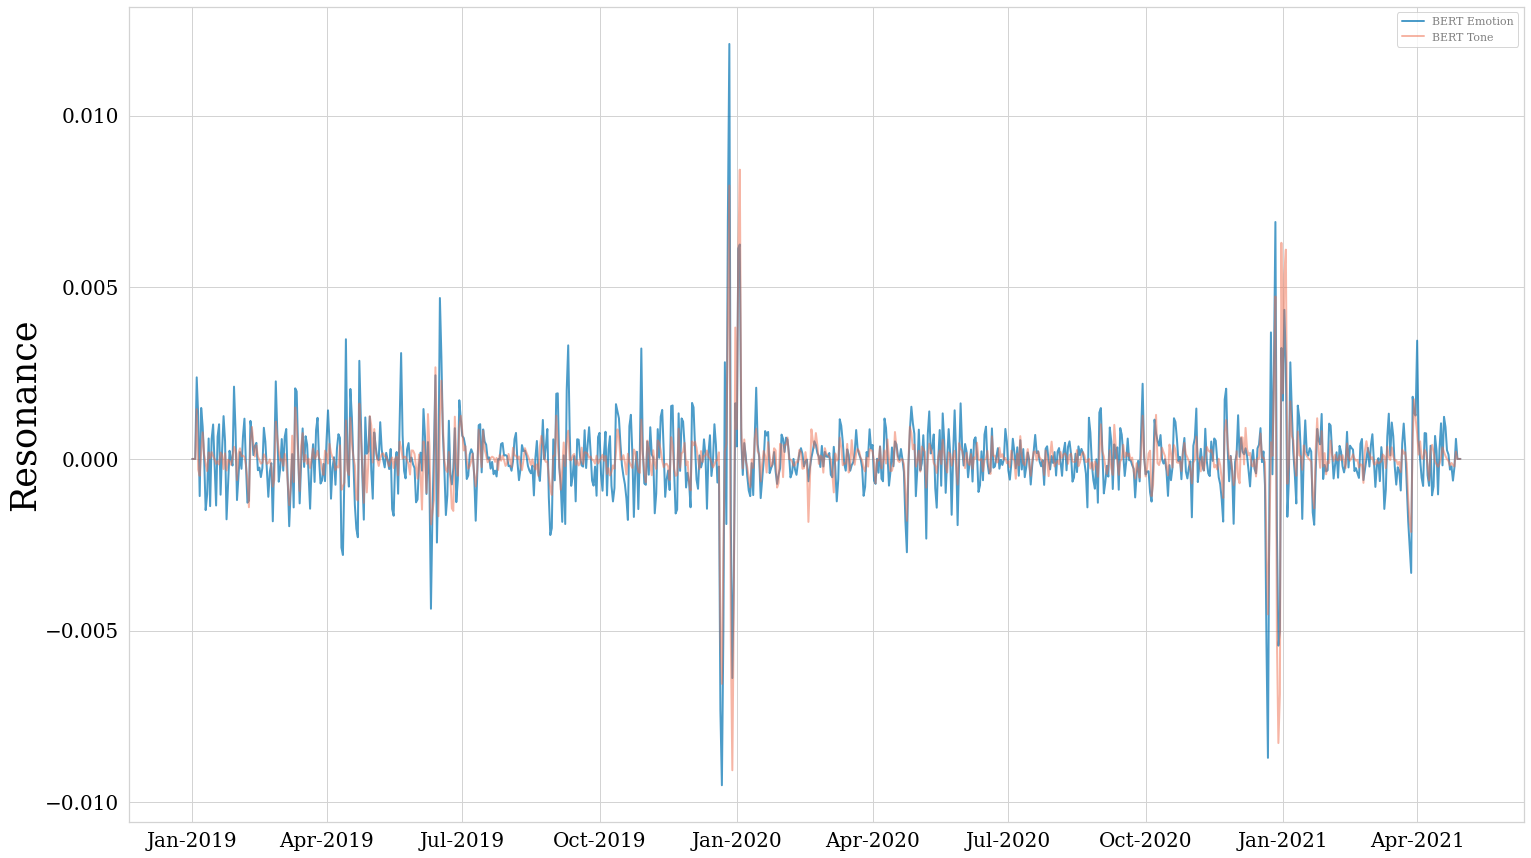

In [32]:
measure = "resonance"
plot_two_signals(measure, df, pol, label1='BERT Emotion', label2='BERT Tone', plot_name=f"../fig/W3_{measure}_both_wlabels.png")

In [6]:
emo_only_file = os.path.join("..", "idmdl", "tweets_emo_only_date_W3.csv")
emo_only = pd.read_csv(emo_only_file)
emo_only["date"] = pd.to_datetime(emo_only["date"])

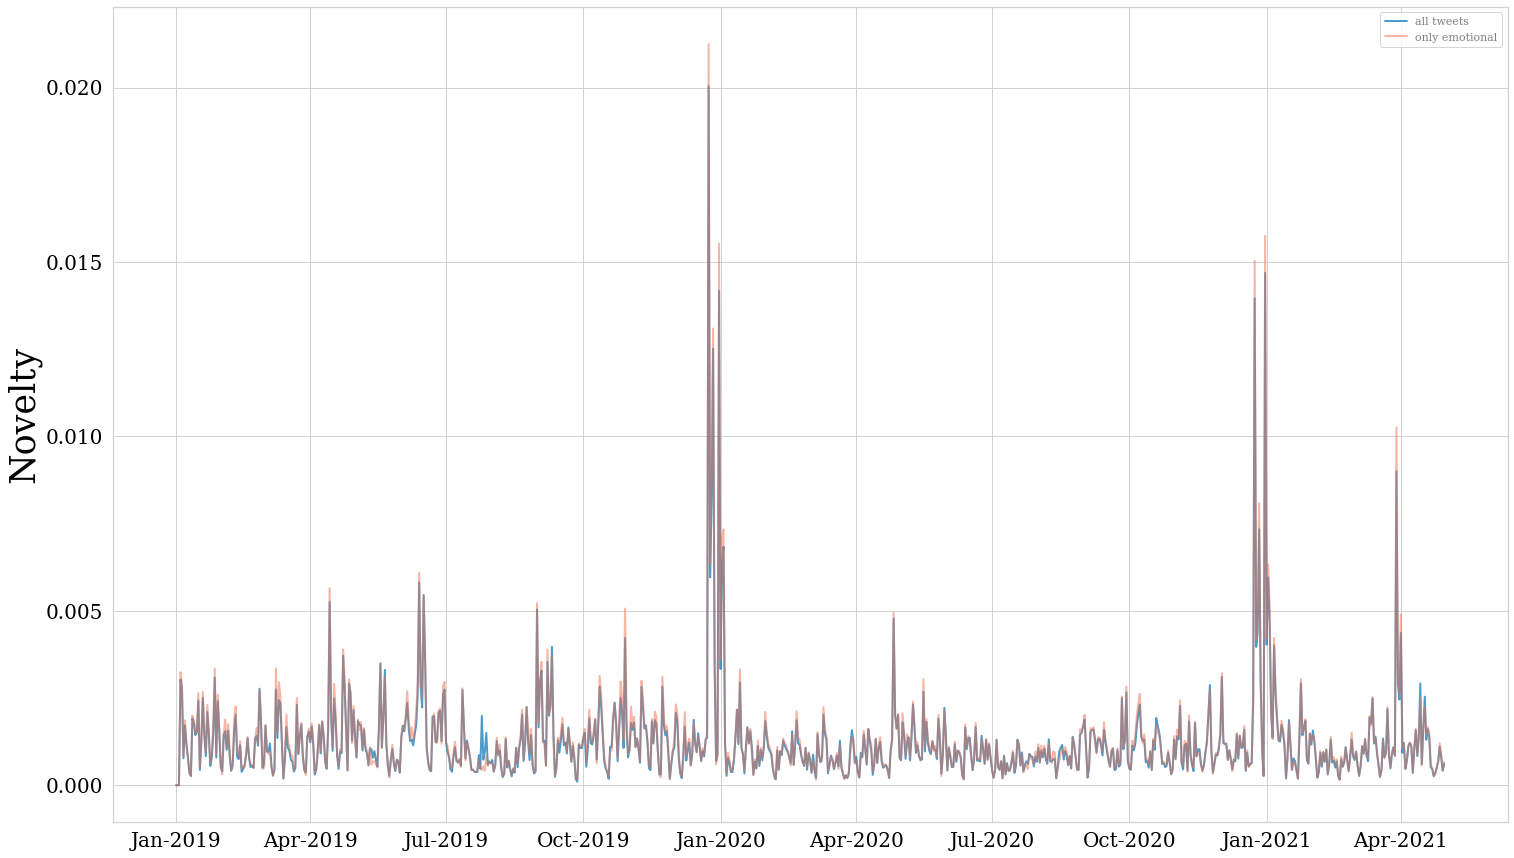

In [34]:
measure = "novelty"
plot_two_signals(measure, df, emo_only, label1='all tweets', label2='only emotional', plot_name=f"../fig/W3_{measure}_emo_only.png")

## Emotions driving the effect

In [59]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [60]:
all_emo_dfs = []
for label in labels:
    filename = os.path.join("..", "idmdl", f"tweets_emo_date_W3_no_{label[:4]}.csv")
    df = pd.read_csv(filename)
    df["date"] = pd.to_datetime(df["date"])
    all_emo_dfs.append(df)
    # plot_novelty_resonance(df, label)
    # plot_novelty_resonance(df, label, save_fig=True, plot_name=f"../fig/res_nov_no_{label[:4]}.png")
all_emo = pd.read_csv(os.path.join("..", "idmdl", "tweets_emo_date_W3.csv"))
all_emo["date"] = pd.to_datetime(all_emo["date"])
all_emo_dfs.append(all_emo)



In [61]:
def plot_all_excluded(dfs:list, measure:str, ymin:float, ymax:float, stacked=False, 
                      save_fig=False, plot_name=None, labels = [
            "Glæde/Sindsro",
            "Tillid/Accept",
            "Forventning/Interrese",
            "Overasket/Målløs",
            "Vrede/Irritation",
            "Foragt/Modvilje",
            "Sorg/trist",
            "Frygt/Bekymret",
            "All emotions included"
        ]):
    fig, axs = plt.subplots(3,3, figsize = (20,10))
    labelsize = 8
    matplotlib.rc('xtick', labelsize=labelsize) 
    matplotlib.rc('ytick', labelsize=labelsize) 
   
    themes.theme_minimal(grid=True, ticks=False, fontsize=10)
    k = 0
    j = 0
    for i, emotion in enumerate(labels):
        # ax1 = fig.add_subplot()
        x = dfs[i]["date"]
        y = dfs[i][measure]
        if stacked:
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[1], label=emotion)
            x = dfs[-1]["date"]
            y = dfs[-1][measure]
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[0], label='all')
        else:
            axs[k, j].plot(x, y, label = f'{emotion} excluded', linewidth = 0.5)
        axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(5))
        axs[k, j].axis(ymin=ymin, ymax=ymax)
        axs[k, j].set_title(f'{emotion} excluded', fontdict = {"fontsize": 13}, color = "Black")
        # if stacked:
        #     axs[k, j].legend()
        if k == 2 and j == 2:
            axs[k, j].set_title(f'{emotion}', fontdict = {"fontsize": 13}, color = "Black")
        j += 1
        if j > 2:
            k += 1
            j = 0
    fig.suptitle(measure.capitalize(), fontsize=30, color="Black")
    plt.subplots_adjust(hspace=0.3)

    if save_fig:
        plt.savefig(plot_name)
    plt.show()

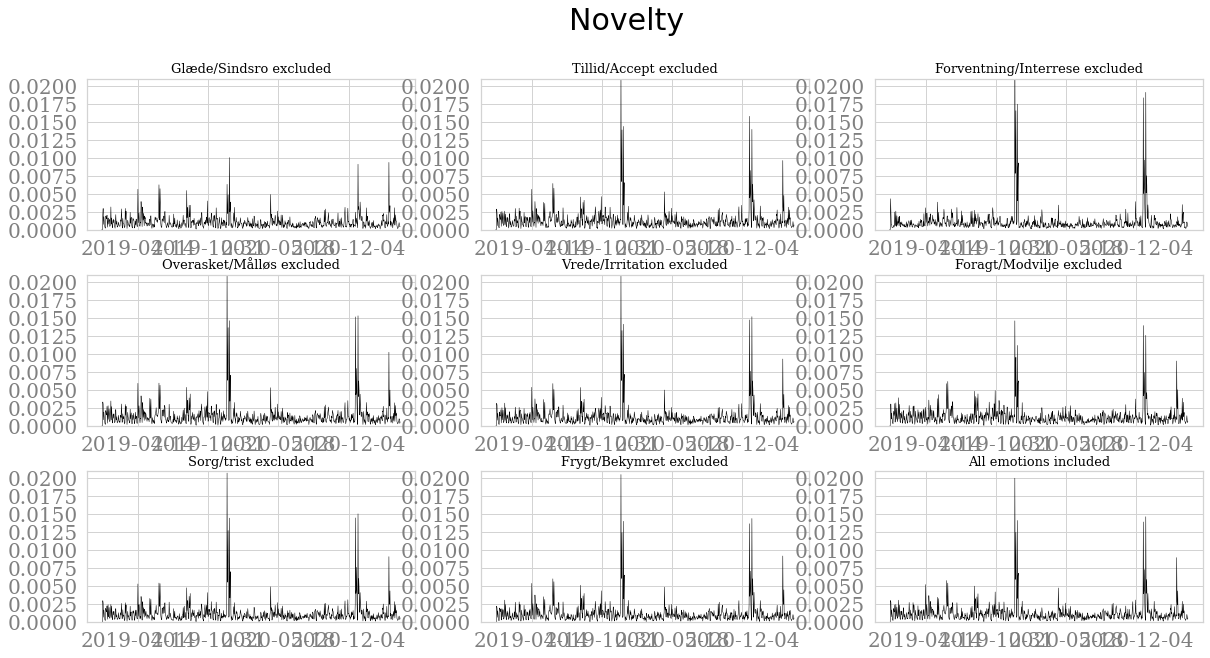

In [62]:
plot_all_excluded(all_emo_dfs, "novelty", ymin=0, ymax=0.021)#, save_fig=True, plot_name=f"../fig/novelty_emotions_excluded_all.png") 

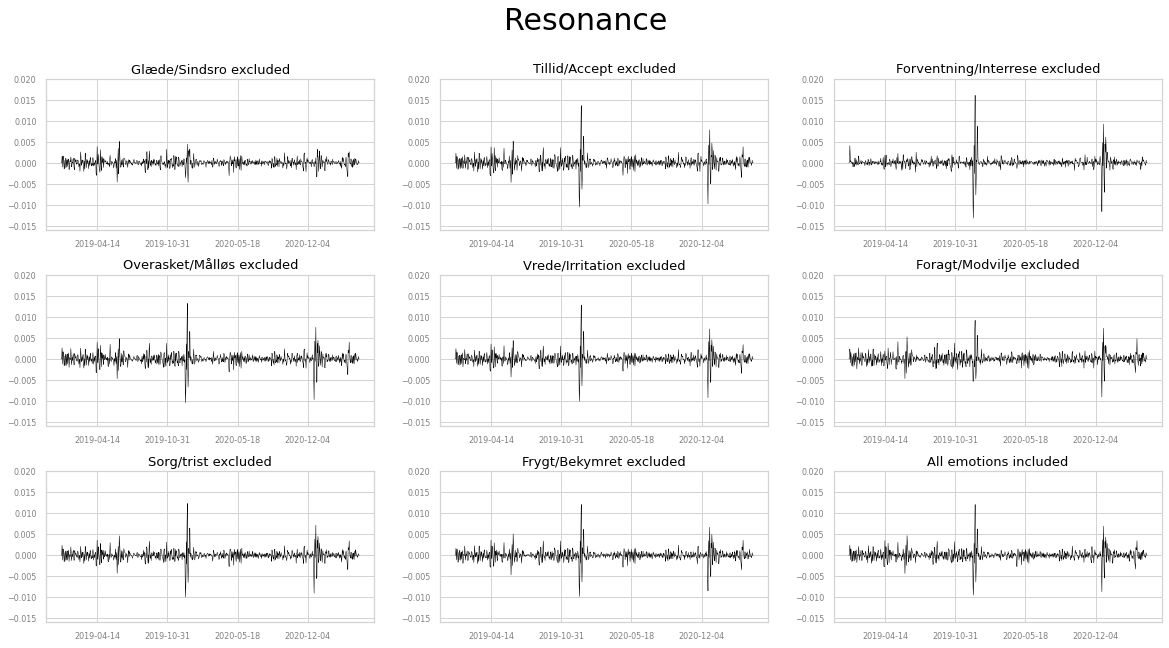

In [63]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02)#, save_fig=True, plot_name=f"../fig/resonance_emotions_excluded_all.png")

## Emotion distributions

In [121]:
tweets = pd.read_csv('/home/commando/stine-sara/data/emotion_tweets_2021.csv', nrows=100)

In [122]:
tweets

,Unnamed: 0,created_at,id,Sentiment_compound,Sentiment_neutral,Sentiment_negative,Sentiment_positive,Bert_subj_label,Bert_subj_prob,Bert_emo_laden,Bert_emo_laden_prob,Bert_emo_emotion,Bert_emo_emotion_prob,polarity,polarity_prob
0,0,2021-04-30T23:59:55.000Z,1388281995055280134,0.2168,0.866,0.000,0.134,subjective,1.00,Emotional,1.0,Overasket/Målløs,[0. 0. 0.001 0.984 0. 0.011 0. 0.003],positive,[0.994 0.005 0.001]
1,1,2021-04-30T23:59:49.000Z,1388281971932073987,0.5904,0.768,0.000,0.232,subjective,1.00,Emotional,1.0,Overasket/Målløs,[0.001 0. 0.003 0.992 0. 0.001 0.002 0.001],neutral,[0.001 0.997 0.002]
2,2,2021-04-30T23:59:45.000Z,1388281955595206667,0.0000,1.000,0.000,0.000,subjective,1.00,Emotional,1.0,Foragt/Modvilje,[0.003 0.002 0.032 0.121 0.001 0.83 0.003 0.009],negative,[0.123 0.009 0.868]
3,3,2021-04-30T23:59:41.000Z,1388281938369294340,0.4172,0.542,0.133,0.325,subjective,1.00,Emotional,1.0,Tillid/Accept,[0. 0.998 0. 0. 0. 0. 0. 0.001],positive,[0.989 0.001 0.01 ]
4,4,2021-04-30T23:59:17.000Z,1388281836149805059,-0.0215,0.729,0.138,0.133,subjective,0.91,Emotional,1.0,Forventning/Interrese,[0. 0. 0.993 0.002 0. 0.002 0. 0.001],neutral,[0.112 0.887 0.001]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2021-04-30T23:33:22.000Z,1388275315336749056,0.2500,0.773,0.080,0.148,subjective,1.00,Emotional,1.0,Foragt/Modvilje,[0.009 0.053 0.299 0.028 0. 0.598 0.01 0.004],positive,[0.962 0.001 0.037]
96,96,2021-04-30T23:33:16.000Z,1388275290351312896,0.8662,0.716,0.025,0.259,subjective,1.00,Emotional,1.0,Foragt/Modvilje,[0. 0.002 0.003 0. 0.001 0.992 0. 0. ],negative,[0.006 0.001 0.993]
97,97,2021-04-30T23:32:59.000Z,1388275219668815872,-0.2500,0.917,0.083,0.000,subjective,1.00,Emotional,1.0,Forventning/Interrese,[0.002 0.001 0.85 0.001 0.141 0.002 0.001 0.001],neutral,[0.002 0.997 0.001]
98,98,2021-04-30T23:32:49.000Z,1388275177465778177,-0.1437,0.715,0.148,0.137,subjective,1.00,Emotional,1.0,Tillid/Accept,[0. 0.856 0.002 0.002 0.001 0.136 0.001 0.002],negative,[0.026 0.002 0.972]


In [61]:
import ndjson

def ndjson_gen(filepath: str):
    with open(filepath) as f:
        reader = ndjson.reader(f)

        for post in reader:
            yield post

In [155]:
import re

# non-emotional: 19,21,36,56
# very certain: 1, 99
# more uncertain: 6, 7
# 4 is emotional, but neutral
index = 99

tweet_id = str(tweets['id'][index])

emo = tweets['Bert_emo_emotion_prob'][index]

emo_list = re.split(r'\s+', emo[1:-1])[:8]
emo_list = list(map(lambda x: float(x), emo_list))

In [156]:
print(emo_list, tweet_id)

[0.001, 0.0, 0.001, 0.0, 0.001, 0.002, 0.985, 0.011] 1388275051280142336


In [157]:
filepath = os.path.join('/data', '004_twitter-stopword', 'da_stopwords_part1_2021-01-01_2021-04-30.ndjson')

for i, post in enumerate(ndjson_gen(filepath)):
    if post['id'] == tweet_id:
        # print(post['text'])
        break

@AnaKammille Ikke håndtere at det pludselig blev virkeligt.
Men jeg havde virkeligt troet at de ville være der for mig.
Det gjorde virkelig ondt og det endte faktisk med at jeg ikke har noget kontakt med dem mere.
Jeg var simpelthen nødt til at komme videre, både de og en masse andre som


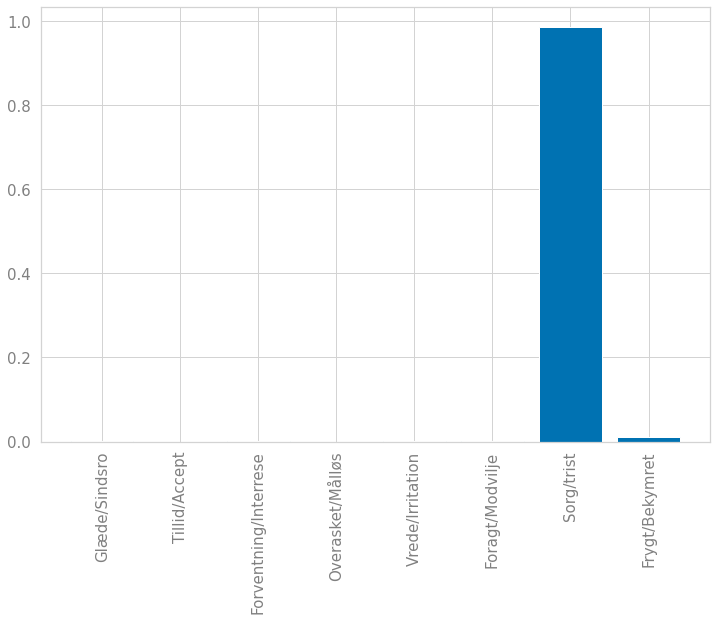

In [158]:
emotion_int = [1,2,3,4,5,6,7,8]

emotion_labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

labelsize = 15
matplotlib.rc('xtick', labelsize=labelsize) 
matplotlib.rc('ytick', labelsize=labelsize) 

themes.theme_minimal(grid=True, ticks=False, fontsize=10)

plt.bar(emotion_int, emo_list, align='center', color="#0072B2")
plt.xticks(emotion_int, emotion_labels)
plt.xticks(rotation=90)
plt.show()